Scott Berry - Assignment 6

We have learned the importance of representation. Let's try the example to understand better. Here is the code to produce the data similar to the example we used.

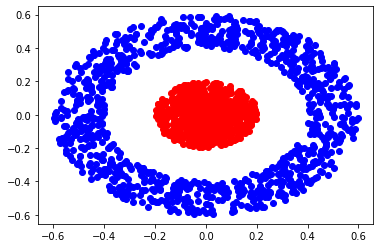

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

PI=np.pi
PI2=2*PI

def gencircle(rc,rr=0.1,offset=[0,0],num=100,label=0):
    #taken from https://qiita.com/xiangze750/items/1d024c8536d128c3ceae
    c=[]
    for i in range(num):
        r=rc+np.random.uniform(-rr,rr,1)
        th=np.random.uniform(0,PI2,1)
        c.append([r*np.sin(th)+offset[0],r*np.cos(th)+offset[1]])
    return np.c_[np.array(c).reshape(num,2),np.repeat(label,num)]

X=np.r_[gencircle(0.1,0.1,num=1000,label=0),gencircle(0.5,0.1,num=1000,label=1)][:,0:2]

plt.scatter(X[0:1000,0],X[0:1000,1],color="red")
plt.scatter(X[1000:2000,0],X[1000:2000,1],color="blue")

As you see, X is a matrix whose shape is 2000×2

the first 1000 rows are corresponding to red points, and the second 1000 row are corresponding to the blue data points.
### Task

- Try logistic regression to classify the data. It's okay if it does not work.
- Try feed forward neural network to classify the data. For this one, you need to find the architecture that works. Remember that you can adjust number of hidden layers and number of hidden units in each layer, activation function, etc.
- Report the (training) classification accuracy for both.

Use tensorflow for coding. This time, you do not have to test the algorithm on test dataset, because the purpose it to understand the importance of representation learning.

## Logistic Regression

Structure Data

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# add 0 to represent red for first 1000 points and 1 to represent blue for last 1000 points
new_col = np.zeros((2000,1))
new_col[1000:] = 1
X_mod = np.append(X, new_col, 1)

# split
X_train, X_test, y_train, y_test = train_test_split(X_mod[:, :-1], X_mod[:, -1], test_size=0.25, random_state=0)

# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Logistic Regression using TF

Instructions for updating:
non-resource variables are not supported in the long term
Epoch 10 Cost: 2836.2646484375
Epoch 20 Cost: 2811.1077880859375
Epoch 30 Cost: 2798.2532958984375
Epoch 40 Cost: 2790.9415283203125
Accuracy Score: 1.0


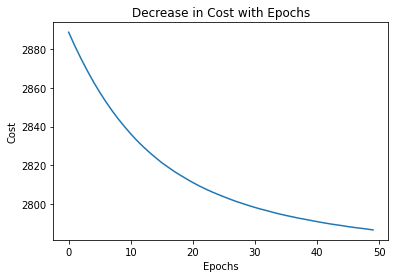

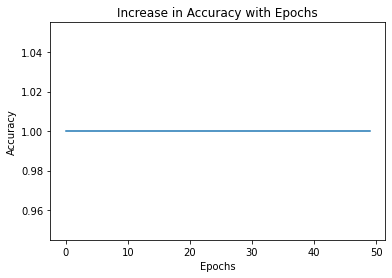

In [3]:
from sklearn.preprocessing import OneHotEncoder
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

oneHot = OneHotEncoder()
oneHot.fit(X)
x = oneHot.transform(X).toarray()
oneHot.fit(new_col)
y = oneHot.transform(new_col).toarray()
alpha, epochs = 0.001, 50
m, n = x.shape
X = tf.placeholder(tf.float32, [None, n])
Y = tf.placeholder(tf.float32, [None, 2])
W = tf.Variable(tf.zeros([n, 2]))
b = tf.Variable(tf.zeros([2]))
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))
cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = Y_hat, labels = Y)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = alpha).minimize(cost)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    cost_history, accuracy_history = [], []
    for epoch in range(epochs):
        cost_per_epoch = 0
        sess.run(optimizer, feed_dict = {X : x, Y : y})
        c = sess.run(cost, feed_dict = {X : x, Y : y})
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        cost_history.append(sum(sum(c)))
        accuracy_history.append(accuracy.eval({X : x, Y : y}))
        if epoch % 10 == 0 and epoch != 0:
            print("Epoch " + str(epoch) + " Cost: " + str(cost_history[-1]))
    Weight = sess.run(W)
    Bias = sess.run(b)
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy Score:", accuracy_history[-1])

plt.plot(list(range(epochs)), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Decrease in Cost with Epochs')
plt.show()

plt.plot(list(range(epochs)), accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Increase in Accuracy with Epochs')
plt.show()

Feed forward Neural Network using TF

Train on 1350 samples, validate on 150 samples
Epoch 1/50
1350/1350 [==============================] - 0s 191us/sample - loss: 0.6363 - acc: 0.7274 - val_loss: 0.5998 - val_acc: 0.7333
Epoch 2/50
1112/1350 [=======================>......] - ETA: 0s - loss: 0.5097 - acc: 0.8390

C:\Users\berry\AppData\Roaming\Python\Python310\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1350/1350 [==============================] - 0s 144us/sample - loss: 0.4976 - acc: 0.8407 - val_loss: 0.4431 - val_acc: 0.8533
Epoch 3/50
1350/1350 [==============================] - 0s 135us/sample - loss: 0.3753 - acc: 0.8793 - val_loss: 0.3627 - val_acc: 0.8600
Epoch 4/50
1350/1350 [==============================] - 0s 128us/sample - loss: 0.3210 - acc: 0.8904 - val_loss: 0.3307 - val_acc: 0.8533
Epoch 5/50
1350/1350 [==============================] - 0s 132us/sample - loss: 0.2950 - acc: 0.8941 - val_loss: 0.3117 - val_acc: 0.8733
Epoch 6/50
1350/1350 [==============================] - 0s 126us/sample - loss: 0.2804 - acc: 0.8948 - val_loss: 0.2978 - val_acc: 0.8667
Epoch 7/50
1350/1350 [==============================] - 0s 131us/sample - loss: 0.2698 - acc: 0.8926 - val_loss: 0.2881 - val_acc: 0.8867
Epoch 8/50
1350/1350 [==============================] - 0s 132us/sample - loss: 0.2599 - acc: 0.8919 - val_loss: 0.2729 - val_acc: 0.8867
Epoch 9/50
1350/1350 [=======================

C:\Users\berry\AppData\Roaming\Python\Python310\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


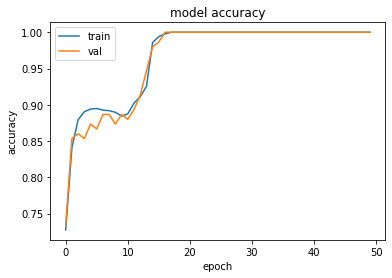

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = ann.fit(X_train, y_train, validation_split = 0.1, epochs=50, batch_size=4)

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score: " + str(acc))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()